<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 100.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [7]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print("First few duplicate rows:")
print(duplicate_rows.head())

#  Remove duplicate rows
df = df.drop_duplicates()

# Verify duplicates are removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows: 0
First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmi

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [10]:
# Count missing values in the 'CodingActivities' column
missing_coding_activities = df['CodingActivities'].isnull().sum()

print(f"Number of missing values in 'CodingActivities': {missing_coding_activities}")


Number of missing values in 'CodingActivities': 0


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [11]:
# Impute missing values in 'CodingActivities' using forward fill (ffill)
df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')

# Verify if missing values are imputed
missing_after_ffill = df['CodingActivities'].isnull().sum()
print(f"Missing values in 'CodingActivities' after forward-fill: {missing_after_ffill}")


Missing values in 'CodingActivities' after forward-fill: 0


/tmp/ipykernel_482/1594393078.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [12]:
# Section 3: Normalizing Compensation Data
# Task 4: Identify compensation-related columns

# List all columns containing the word 'Comp' (related to compensation)
comp_columns = [col for col in df.columns if 'Comp' in col]
print("Compensation-related columns found in the dataset:")
print(comp_columns)

# Preview statistics of ConvertedCompYearly if it exists
if 'ConvertedCompYearly' in df.columns:
    print("\nSummary statistics of 'ConvertedCompYearly':")
    print(df['ConvertedCompYearly'].describe())
else:
    print("\nNo 'ConvertedCompYearly' column found in the dataset.")


Compensation-related columns found in the dataset:
['CompTotal', 'AIComplex', 'ConvertedCompYearly']

Summary statistics of 'ConvertedCompYearly':
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [13]:
# Task 5: Normalize ConvertedCompYearly using Min-Max Scaling

# Drop missing values before scaling
comp_data = df['ConvertedCompYearly'].dropna()

# Calculate Min and Max for normalization
min_val = comp_data.min()
max_val = comp_data.max()

# Apply Min-Max Scaling
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)

# Display first 5 rows of the new normalized column
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head(10))


   ConvertedCompYearly  ConvertedCompYearly_MinMax
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN
5                  NaN                         NaN
6                  NaN                         NaN
7                  NaN                         NaN
8                  NaN                         NaN
9                  NaN                         NaN


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [14]:
# Task 6: Apply Z-score Normalization to ConvertedCompYearly

# Drop missing values before calculating mean and std
comp_data = df['ConvertedCompYearly'].dropna()

# Calculate mean and standard deviation
mean_val = comp_data.mean()
std_val = comp_data.std()

# Apply Z-score normalization
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_val) / std_val

# Display first 10 rows of the original and normalized columns
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head(10))


   ConvertedCompYearly  ConvertedCompYearly_Zscore
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN
5                  NaN                         NaN
6                  NaN                         NaN
7                  NaN                         NaN
8                  NaN                         NaN
9                  NaN                         NaN


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


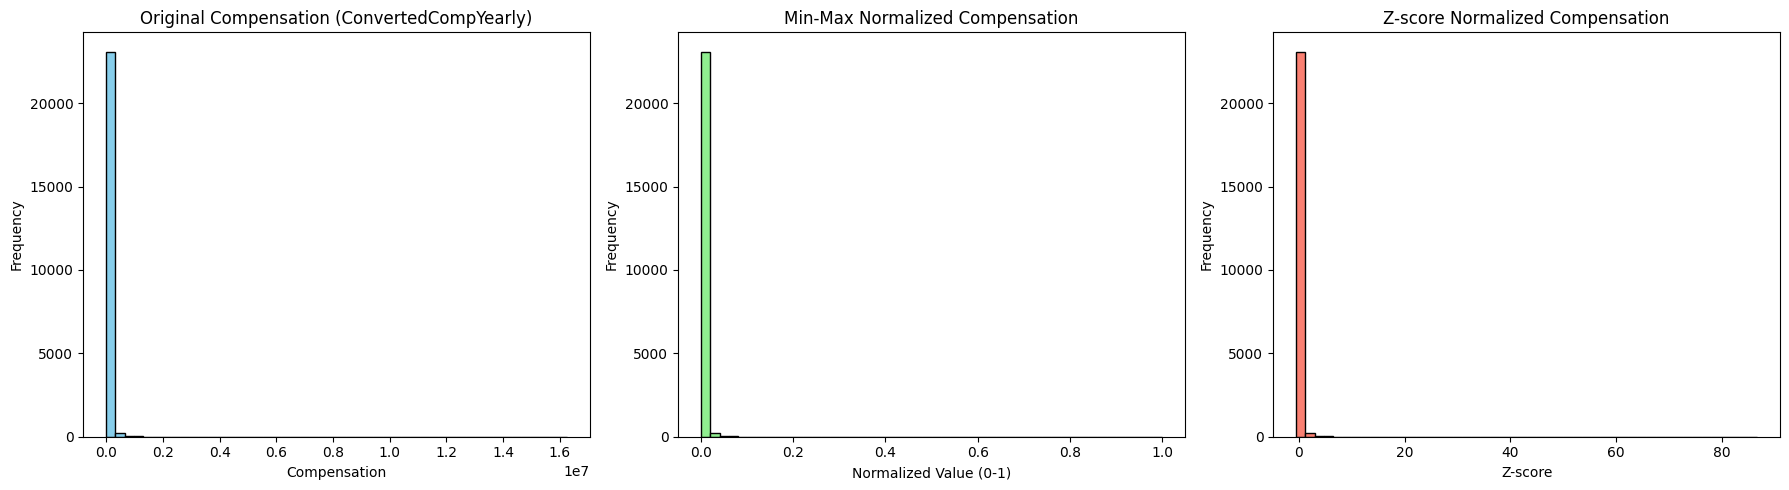

In [15]:
import matplotlib.pyplot as plt

# Create subplots for original, Min-Max, and Z-score normalized compensation
plt.figure(figsize=(18, 5))

# Original Compensation
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Original Compensation (ConvertedCompYearly)")
plt.xlabel("Compensation")
plt.ylabel("Frequency")

# Min-Max Normalized Compensation
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title("Min-Max Normalized Compensation")
plt.xlabel("Normalized Value (0-1)")
plt.ylabel("Frequency")

# Z-score Normalized Compensation
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Zscore'].dropna(), bins=50, color='salmon', edgecolor='black')
plt.title("Z-score Normalized Compensation")
plt.xlabel("Z-score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
